In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

def linear(X, b0, b1):
    return [b0+b1*x for x in X]


# b0 - Intercept
def intercept(X, Y, b1):
    x_ = np.mean(X)
    y_ = np.mean(Y)
    return y_-b1*x_


# b1 - Slope
def slope(X, Y): 
    x_ = np.mean(X)
    y_ = np.mean(Y)
    rise = sum([(x-x_) * (y-y_) for x,y in zip(X,Y)])
    run = sum([(x-x_)**2 for x,y in zip(X,Y)])
    return rise / run


data = pd.read_csv("../data/Small-diameter-flow.csv", index_col=0)
data.head()

,Flow,Kinematic,Geometric,Inertial,Observer
0,-17.047687,-0.584344,-6.896327,-14.323560,0.0
1,-17.043179,-0.584344,-6.896327,-14.323560,0.0
2,-17.043179,-0.584344,-6.896327,-14.323560,0.0
3,-11.182193,1.242506,-5.069476,-11.583284,0.0
4,-11.184430,1.242506,-5.069476,-11.583284,0.0


In [2]:
print("Rows {} Columns {}".format(data.shape[0], data.shape[1]))

Rows 198 Columns 5


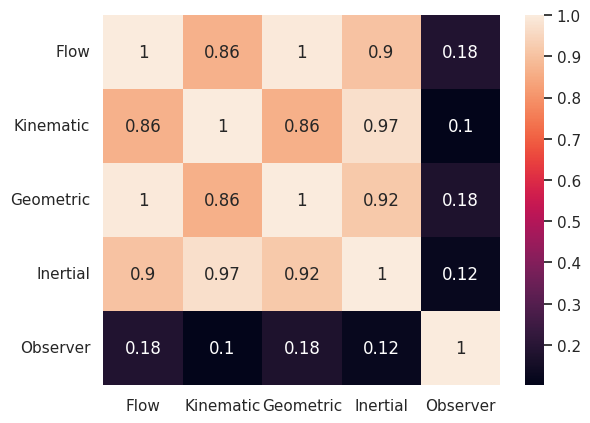

In [ ]:
sns.heatmap(data.corr(), annot=True)
plt.show()

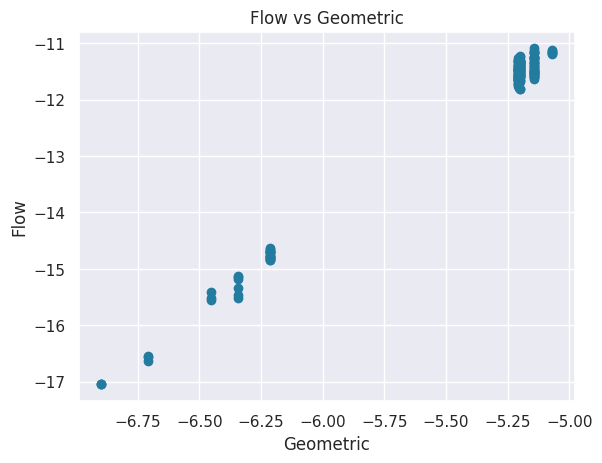

In [9]:
final_data = data[['Geometric', 'Flow']] 
predictor = data['Geometric'] 
target = data['Flow']

plt.title("Flow vs Geometric")
plt.scatter(predictor, target, color = "#247ba0")
plt.xlabel('Geometric')
plt.ylabel('Flow')
plt.show()

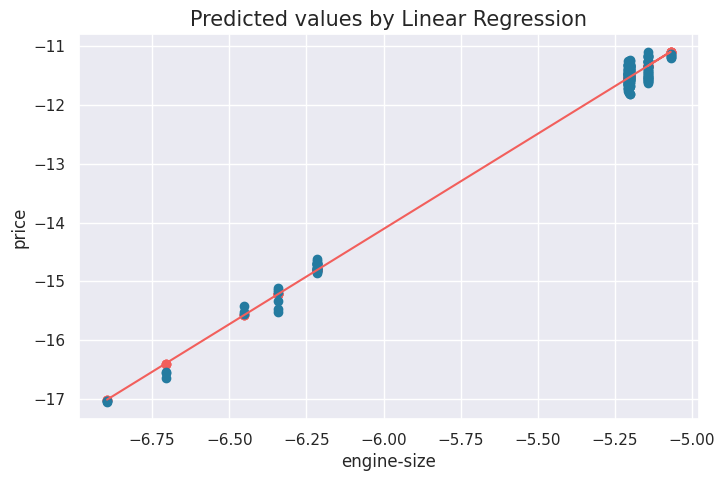

In [10]:
b1 = slope(predictor, target)
b0 = intercept(predictor, target, b1)
predicted = linear(predictor, b0, b1)
plt.figure(figsize = (8, 5))
plt.plot(predictor, predicted, color = '#f25f5c')
plt.scatter(predictor, predicted, color = '#f25f5c')
plt.title('Predicted values by Linear Regression', fontsize = 15)
plt.xlabel('Geometric')
plt.ylabel('Flow')
plt.scatter(predictor, target, color = "#247ba0")
plt.show()

In [11]:
print("Coefficients:\n=============")
print("b0 : ", b0)
print("b1 : ", b1)

Coefficients:
b0 :  5.332380386469222
b1 :  3.2400047012200464


In [12]:
def r_squared(Y, Y_HAT):
    ssr, sse, r_sqr = [0]*3
    y_ = np.mean(Y)
#   ssr = sum([(y_hat - y_)**2 for y_hat in Y_HAT])
    sse = sum([(y - y_hat)**2 for y,y_hat in zip(Y, Y_HAT)])
    sst = sum([(y - y_)**2 for y in Y])
    r_sqr = 1 - (sse / sst)
    return r_sqr
r_squared(target, predicted)

np.float64(0.9916062785832102)